<h1> Analisys: N16-BodyProblem (efficiency)</h1>

<ul id="top">
  <li><a href="#Initializations">Initializations</a></li>
  <li><a href="#Input-statistics">Input-statistics</a></li>
  <li><a href="#Integration-Parameters">Integration-Parameters </a></li>
  <li><a href="#Numerical-Integrations-Threads1">Numerical-Integrations-Threads1</a></li>
      <ul>
        <li><a href="#Data-Threads1">Data-Threads1</a></li>
        <li><a href="#Graphics-Threads1">Graphics-Threads1</a></li>
      </ul>
  <li><a href="#Numerical-Integrations-Thread4">Numerical-Integrations-Thread4</a></li>
        <ul>
        <li><a href="#Data-Threads4">Data-Threads4</a></li>
        <li><a href="#Graphics-Threads4">Graphics-Threads4</a></li>
      </ul>
  <li><a href="#Select-fair-hsteps">Select-fair-hsteps</a></li>
</ul>  

<h2 id="Initializations">Initializations</h2>

In [1]:
#Pkg.add("NBInclude")
using NBInclude;
using Dates;
using Plots;
using DelimitedFiles;

In [2]:
MYPATH="../../../Code/Julia/"
@nbinclude(string(MYPATH,"NBodyProblem.ipynb"));
@nbinclude(string(MYPATH,"C-Interfaces.ipynb"));
@nbinclude(string(MYPATH,"AuxiliarFunctions.ipynb"));

In [3]:
#Filenames
#Input

# Eficiency statistics (Threads=1)
StatcsT11="./Data/StacsT11.txt"
StatcsT12="./Data/StacsT12.txt"
StatcsT13="./Data/StacsT13.txt";
StatcsT14="./Data/StacsT14.txt";
# Eficiency statistics (Threads=4)
StatcsT44="./Data/StacsT44.txt";

In [4]:
#Plot parameters
# Title
MyTitle="N16-Body Problem"
# Energy plots
Eaxa=-26
Eaxb=-10
# Position and velocity plots
axisya=-26
axisyb=-12;

In [5]:
# Lables, colors and markers
#
#label="ABAH1064-L",  marker = :diamond, color="blue"
#label="ABAH1064-LQ", marker = :hexagon, color="Lightblue"
#label="FCIRK16-L", marker = :circle, color="orange"
#label="FCIRK16-LQ", marker = :square,color="red"
#label="FCIRK16-LQ (thr=4)", marker = :square, color="green"

<a href="#top">Back to the top</a>

<h2 id="Input-statistics">Input-statistics</h2>

In [6]:
f1=open(StatcsT11,"r");
f2=open(StatcsT12,"r");
f3=open(StatcsT13,"r");
f4=open(StatcsT14,"r");
results1=readdlm(f1)
results2=readdlm(f2)
results3=readdlm(f3)
results4=readdlm(f4)
close(f1)
close(f2)
close(f3)
close(f4)

In [7]:
f4=open(StatcsT44,"r");
results4T4=readdlm(f4)
close(f4)

<a href="#top">Back to the top</a>

## Integration-Parameters

In [8]:
t0=0.
tend=1000000.;

<h2 id="Numerical-Integrations-Threads1">Numerical-Integrations-Threads1</h2>

<h3 id="Data-Threads1">Data-Threads1</h3>

In [9]:
nk=22*4;
nsuccess1,nsteps1,nfcn1,MaxDE1,CTime1,WTime1=Assing_results(nk,results1)    
nsuccess2,nsteps2,nfcn2,MaxDE2,CTime2,WTime2=Assing_results(nk,results2)    
nsuccess3,nsteps3,nfcn3,MaxDE3,CTime3,WTime3=Assing_results(nk,results3)    
nsuccess4,nsteps4,nfcn4,MaxDE4,CTime4,WTime4=Assing_results(nk,results4)
transpose([nsuccess1,nsuccess2,nsuccess4,nsuccess4])

1×4 Transpose{Float64,Array{Float64,1}}:
 88.0  88.0  88.0  88.0

<h3 id="Data-Threads1">Graphics-Threads1</h3>

<h4> Plot (DE/ Nfcn) </h4>

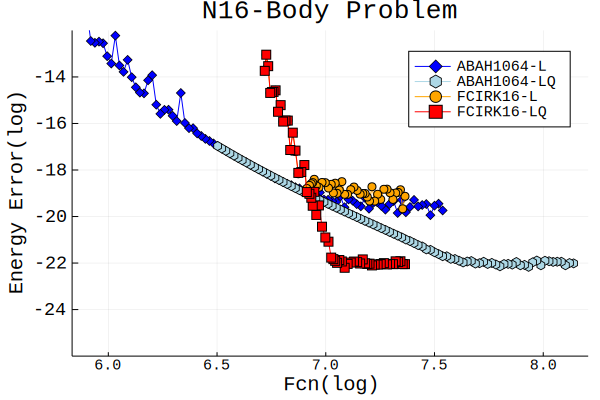

In [10]:
plot(nfcn1, MaxDE1,  marker = :diamond, color="blue", label="ABAH1064-L")
plot!(nfcn2, MaxDE2, marker = :hexagon, color="Lightblue", label="ABAH1064-LQ")
plot!(nfcn3, MaxDE3, marker = :circle,  color="orange", label="FCIRK16-L")
plot!(nfcn4, MaxDE4, marker = :square, color="red", label="FCIRK16-LQ")
plot!(title=MyTitle,
      xlabel="Fcn(log)",
      ylabel="Energy Error(log)",
      ylims=(axisya,axisyb),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
      ytickfont = font(10, "Courier")
)

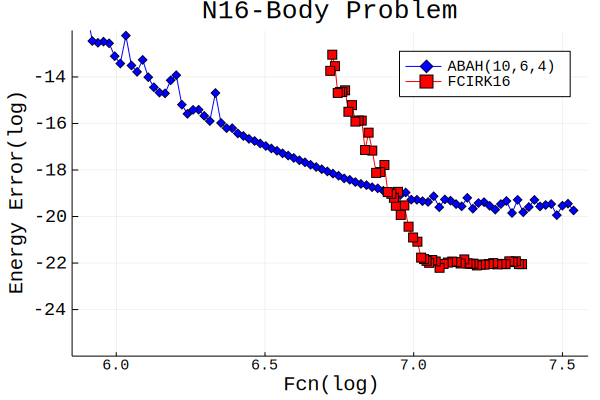

In [11]:
plot(nfcn1, MaxDE1,  marker = :diamond,color="blue", label="ABAH(10,6,4)")
plot!(nfcn4, MaxDE4, marker = :square, color="red", label="FCIRK16")
plot!(title=MyTitle,
      xlabel="Fcn(log)",
      ylabel="Energy Error(log)",
      ylims=(axisya,axisyb),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
      ytickfont = font(10, "Courier")
)

In [12]:
savefig("./FiguresPost/Fig1a.pdf")

<h4> Plot (DE/ CPU Time) </h4>

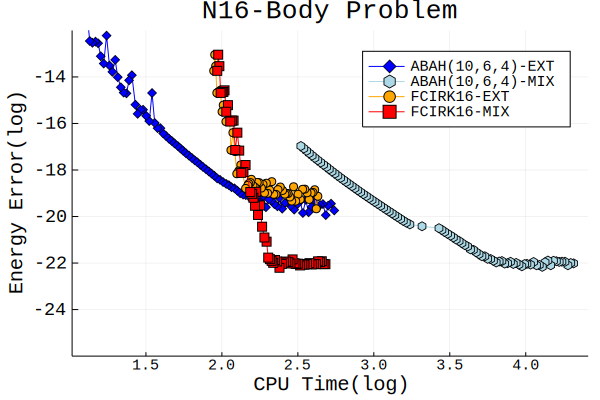

In [13]:
plot(CTime1, MaxDE1,  marker = :diamond, color="blue",  label="ABAH(10,6,4)-EXT")
plot!(CTime2, MaxDE2, marker = :hexagon, color="Lightblue",label="ABAH(10,6,4)-MIX")
plot!(CTime3, MaxDE3, marker = :circle, color="orange",label="FCIRK16-EXT")
plot!(CTime4, MaxDE4, marker = :square,color="red",label="FCIRK16-MIX")
plot!(title=MyTitle,
      xlabel="CPU Time(log)",
      ylabel="Energy Error(log)",
      ylims=(axisya,axisyb),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
      ytickfont = font(10, "Courier")
)

In [14]:
savefig("./FiguresPost/Fig2.pdf")

<h3> Irudiak (DE/ WALL Time) </h3>

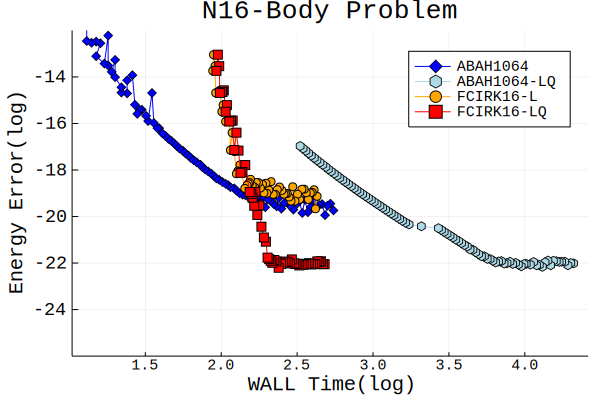

In [15]:
plot(WTime1, MaxDE1, marker = :diamond, color="blue", label="ABAH1064")
plot!(WTime2, MaxDE2, marker = :hexagon, color="Lightblue",label="ABAH1064-LQ")
plot!(WTime3, MaxDE3,  marker = :circle, color="orange",label="FCIRK16-L")
plot!(WTime4, MaxDE4, marker = :square, color="red",label="FCIRK16-LQ")
plot!(title=MyTitle,
xlabel="WALL Time(log)",
      ylabel="Energy Error(log)",
      ylims=(axisya,axisyb),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
      ytickfont = font(10, "Courier")
)

<a href="#top">Back to the top</a>

<h2 id="Numerical-Integrations-Threads4">Numerical-Integrations-Threads4</h2>

### Data-Threads4

In [16]:
nsuccess4T4,nsteps4T4,nfcn4T4,MaxDE4T4,CTime4T4,WTime4T4=Assing_results(nk,results4T4);
transpose(nsuccess4T4)

88.0

<h4> Plot (DE/ WALL Time) </h4>

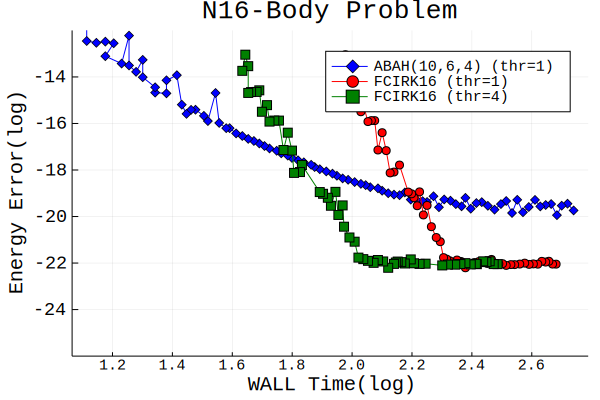

In [17]:
plot(WTime1, MaxDE1, marker = :diamond, color="blue",  label="ABAH(10,6,4) (thr=1)")
plot!(WTime4, MaxDE4,  marker = :circle, color="red", label="FCIRK16 (thr=1)")
plot!(WTime4T4, MaxDE4T4, marker = :square, color="green", label="FCIRK16 (thr=4)")
plot!(title=MyTitle,
xlabel="WALL Time(log)",
      ylabel="Energy Error(log)",
      ylims=(axisya,axisyb),
#      xlims=(0,tend),
#      yticks=[-1e-16,0,1e-16],
      ytickfont = font(10, "Courier")
)

In [18]:
savefig("./FiguresPost/Fig1b.pdf")

<a href="#top">Back to the top</a>

## Select fair hsteps

### FCIRK-LQ h=3, ABAH-L h=0.5, FCIRK-LQ (threads=4) h=1.5

In [19]:
#FCIRK-S8
(CTime4[50:60],MaxDE4[50:60],nsteps4[50:60])

([2.437686998858244, 2.423467627825765, 2.4081331725634625, 2.394575221155234, 2.3789966734203136, 2.36352705664868, 2.3494348226603257, 2.337757045616074, 2.327207348940263, 2.3161059657527274, 2.3048930578092524], [-21.959574852052608, -21.93563551493776, -21.977775643569583, -22.03652004946535, -22.203394945162092, -21.931049412797176, -21.86929997674047, -21.99132193312757, -21.904814133489886, -21.83132402153457, -21.766446564163115], [343880.0, 329300.0, 315340.0, 301970.0, 289160.0, 276900.0, 265170.0, 253920.0, 243160.0, 232850.0, 222980.0])

In [20]:
k1=51 #50
(CTime4[k1],MaxDE4[k1],nsteps4[k1])
(CTime4[k1],MaxDE4[k1],(tend-t0)/nsteps4[k1])

(2.423467627825765, -21.93563551493776, 3.0367446097783177)

In [21]:
#ABAH1064
(CTime1[10:20],MaxDE1[10:20],nsteps1[10:20])

([2.5707076525123678, 2.5518335877100697, 2.532997345794247, 2.5149043190052898, 2.49736734547295, 2.475836627537523, 2.4523911846760194, 2.4334121074998536, 2.414050834778693, 2.3970238012234253, 2.3787632475740974], [-19.817280685893266, -19.281955757917803, -19.848359739466932, -19.332552643287663, -19.46519581242793, -19.703613235025657, -19.538715074658306, -19.381461325254588, -19.421242526731994, -19.663610570301884, -19.19730344466186], [2.59368e6, 2.48372e6, 2.378409e6, 2.27758e6, 2.181019e6, 2.088549e6, 2.0e6, 1.915209e6, 1.834009e6, 1.756249e6, 1.68179e6])

In [22]:
k2=19
(CTime1[k2],MaxDE1[k2],nsteps1[k2])
(CTime1[k2],MaxDE1[k2],(tend-t0)/nsteps1[k2])

(2.3970238012234253, -19.663610570301884, 0.5693953420044652)

In [23]:
#FCIRK-S8 /tjreads=4)
(WTime4T4[30:40],MaxDE4T4[30:40],nsteps4T4[30:40])

([-Inf, -Inf, 2.48572142648158, 2.4727564493172123, 2.459392487759231, 2.44870631990508, 2.437750562820388, 2.416640507338281, 2.413299764081252, 2.3961993470957363, 2.3783979009481375], [-Inf, -Inf, -22.047129590728197, -22.044356170532502, -21.92239139286204, -21.958330375274063, -21.9261104750506, -22.04840051400569, -22.036439138273657, -22.057456633442353, -22.00315263332999], [0.0, 0.0, 750000.0, 718200.0, 687750.0, 658590.0, 630670.0, 603930.0, 578330.0, 553810.0, 530330.0])

In [24]:
k1=34
(WTime4T4[k1],MaxDE4T4[k1],nsteps4T4[k1])
(WTime4T4[k1],MaxDE4T4[k1],(tend-t0)/nsteps4T4[k1])

(2.459392487759231, -21.92239139286204, 1.4540167211922936)

### ABAH1064 h=1 ( FCIRK-LQ thread=4 h=3)

In [25]:
#FCIRK-S8 /tjreads=4)
k1=51     #50
(WTime4T4[k1],MaxDE4T4[k1],nsteps4T4[k1])
(WTime4T4[k1],MaxDE4T4[k1],(tend-t0)/nsteps4T4[k1])

(2.1522883443830563, -21.93563551493776, 3.0367446097783177)

In [27]:
# ABAH
k2=32   #33
(CTime1[k2],MaxDE1[k2],nsteps1[k2])
(CTime1[k2],MaxDE1[k2],(tend-t0)/nsteps1[k2])

(2.15750854361359, -19.082281442435526, 1.0)